# Wine Quality Classification

![Alt text](./img/wine_front1.jpg)<br>
이번 분석에서 사용할 데이터는 레드와인과 화이트와인 데이터 셋을 합친 파일이다. 해당하는 와인은 포르투갈의 "Vinho Verde" 이다. 개인정보 보호 및 물류 문제로 인해서 물리/화학 관련 변수(원인변수)와 평가등급(결과변수)만 사용할 수 있다. 포도 종류, 와인 브랜드명, 와인 가격 등은 따라서 데이터에 포함되어있지 않다.<br>

데이터셋은 분류 혹은 예측 작업으로 보일 수 있다. 각 와인의 등급에는 높고 낮음의 순서가 있으며 불균형을 이루고 있다. 일반 등급의 와인이 최상 혹은 최하 등급의 와인보다 월등하게 많다. 이상치 탐지 알고리즘을 사용하면 이런 소수 등급의 와인을 탐지할 수 있다. 또한 투입된 모든 변수가 관련이 있는지는 확실치 않다. 그래서 여러 변수를 선택해보면서 테스트를 해보는 재미가 있을 것이다.<br><br>

출처 : https://archive.ics.uci.edu/ml/datasets/wine+quality

# Table of Contents (목차)
<br>
### 1. [Import Libraries and Data](#start)
### 2. [Check the Missing Values and Data Status](#second)


<a name="pookie"></a>

In [30]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# 1. Import Libraries and Data   <a name="start"></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('muted')
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('winequality-both.csv')

In [4]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


## EDA

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

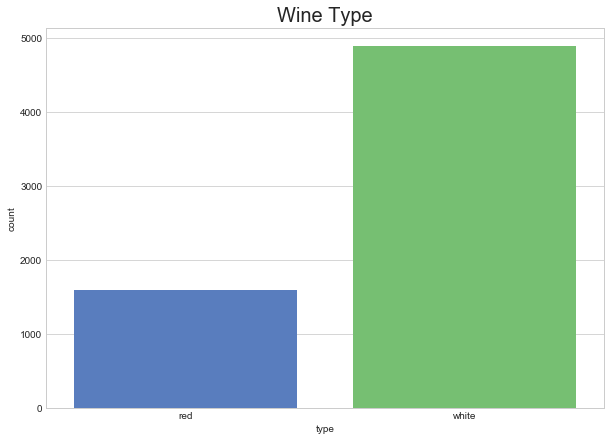

In [8]:
plt.figure(figsize=(10,7))
plt.title('Wine Type', size = 20)
sns.countplot(df.type)

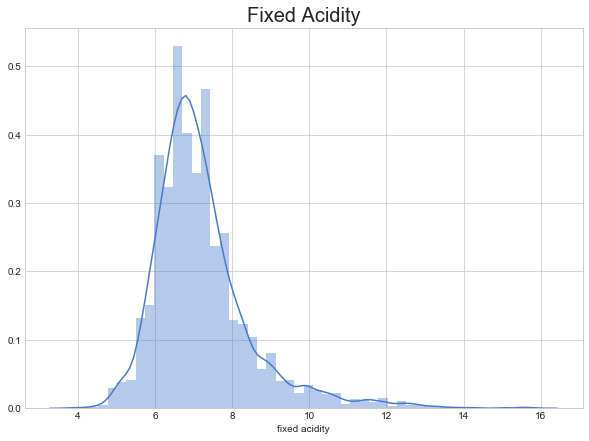

In [9]:
plt.figure(figsize=(10,7))
plt.title('Fixed Acidity', size = 20)
sns.distplot(df['fixed acidity'])
plt.show()

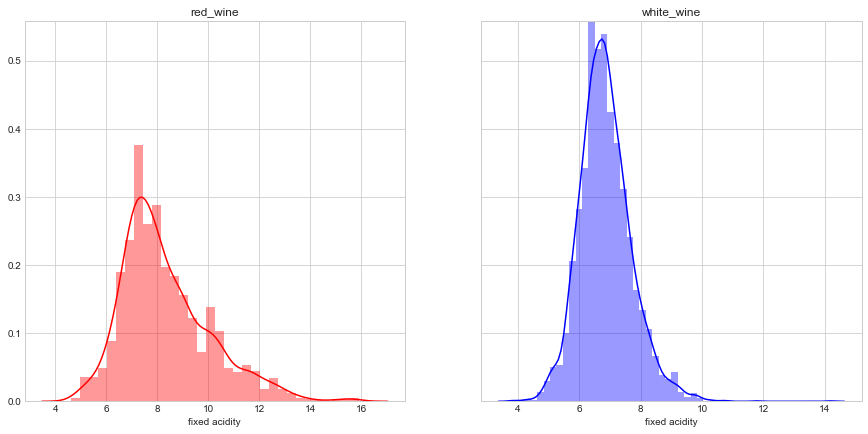

In [66]:
fig,(ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize= (15,7))
sns.distplot(df[df.type=='red']['fixed acidity'], color = 'r', ax=ax0)
ax0.set(title = 'red_wine')
sns.distplot(df[df.type=='white']['fixed acidity'], color='blue', ax=ax1)
ax1.set(title = 'white_wine')
plt.show()

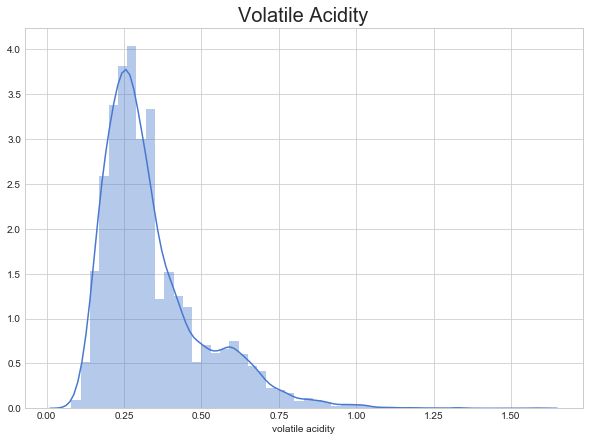

In [10]:
plt.figure(figsize=(10,7))
plt.title('Volatile Acidity', size = 20)
sns.distplot(df['volatile acidity'])
plt.show()

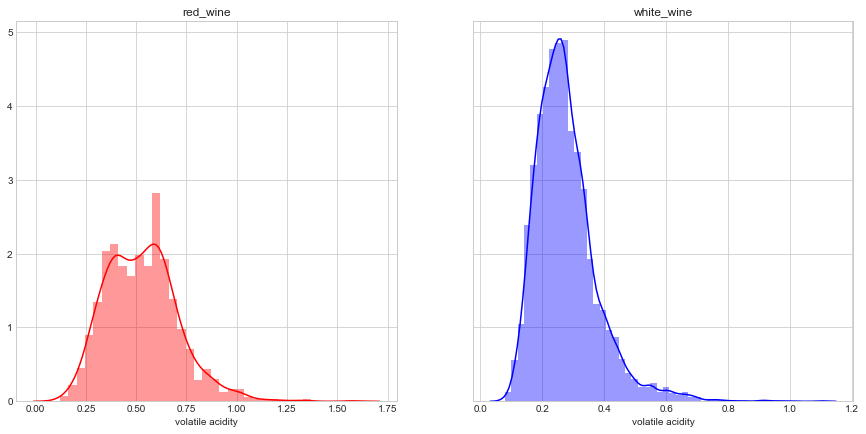

In [116]:
fig,(ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize= (15,7))
sns.distplot(df[df.type=='red']['volatile acidity'], color = 'r', ax=ax0)
ax0.set(title = 'red_wine')
sns.distplot(df[df.type=='white']['volatile acidity'], color='blue', ax=ax1)
ax1.set(title = 'white_wine')
plt.show()

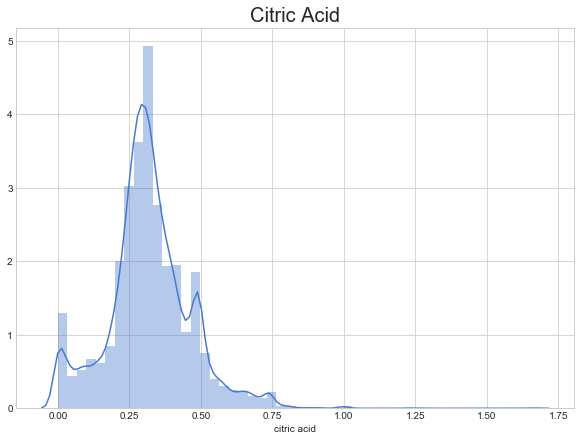

In [11]:
plt.figure(figsize=(10,7))
plt.title('Citric Acid', size = 20)
sns.distplot(df['citric acid'])

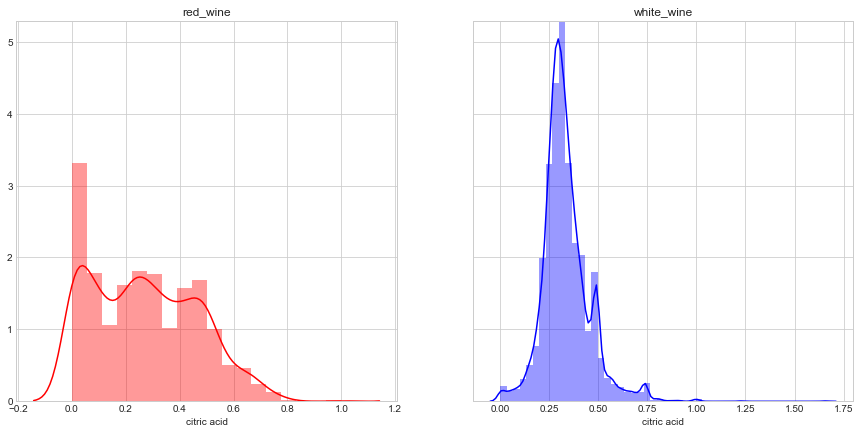

In [119]:
fig,(ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize= (15,7))
sns.distplot(df[df.type=='red']['citric acid'], color = 'r', ax=ax0)
ax0.set(title = 'red_wine')
sns.distplot(df[df.type=='white']['citric acid'], color='blue', ax=ax1)
ax1.set(title = 'white_wine')
plt.show()

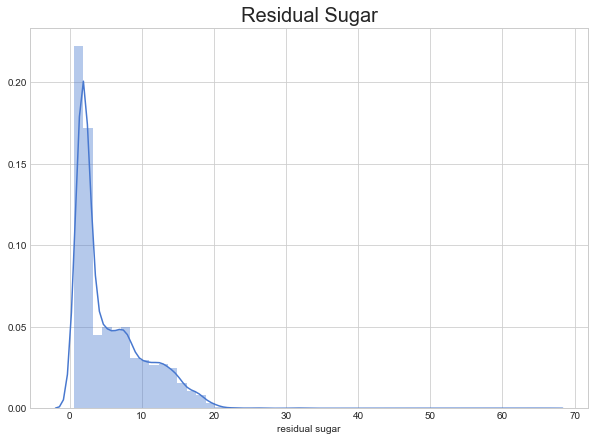

In [12]:
plt.figure(figsize=(10,7))
plt.title('Residual Sugar', size = 20)
sns.distplot(df['residual sugar'])
plt.show()

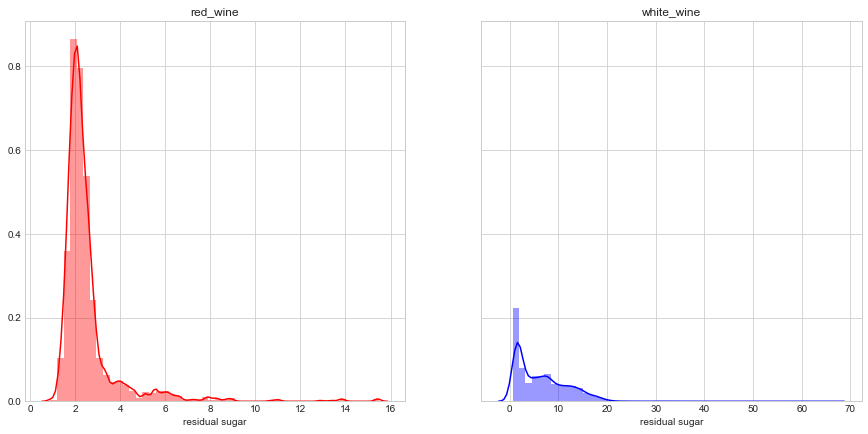

In [69]:
fig,(ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize= (15,7))
sns.distplot(df[df.type=='red']['residual sugar'], color = 'r', ax=ax0)
ax0.set(title = 'red_wine')
sns.distplot(df[df.type=='white']['residual sugar'], color='blue', ax=ax1)
ax1.set(title = 'white_wine')
plt.show()

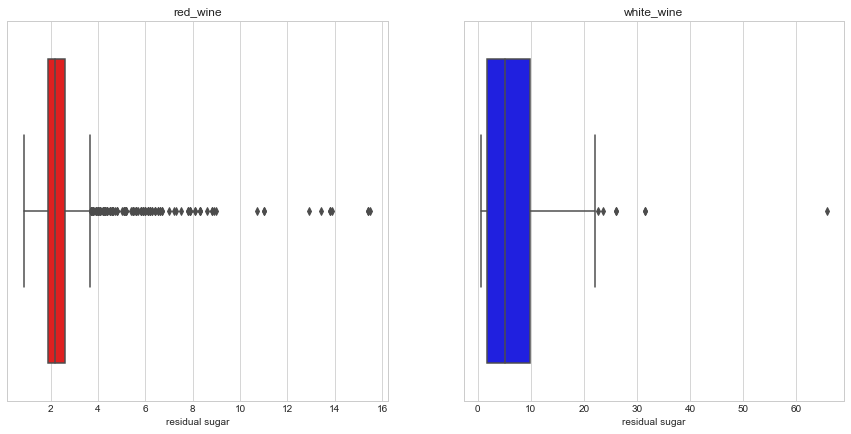

In [70]:
fig,(ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize= (15,7))

sns.boxplot(df[df.type=='red']['residual sugar'], color = 'r', ax=ax0)
ax0.set(title = 'red_wine')

sns.boxplot(df[df.type=='white']['residual sugar'], color='blue', ax=ax1)
ax1.set(title = 'white_wine')

plt.show()

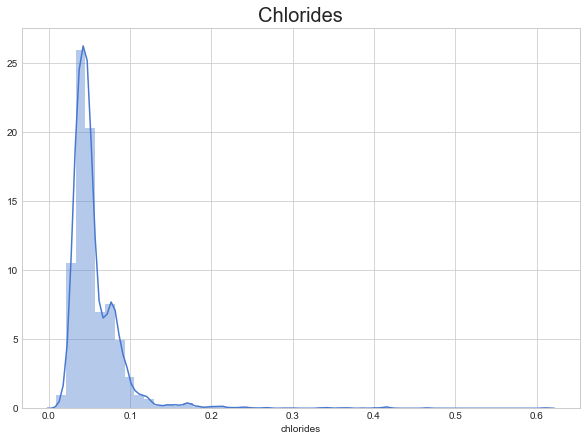

In [13]:
plt.figure(figsize=(10,7))
plt.title('Chlorides', size = 20)
sns.distplot(df['chlorides'])
plt.show()

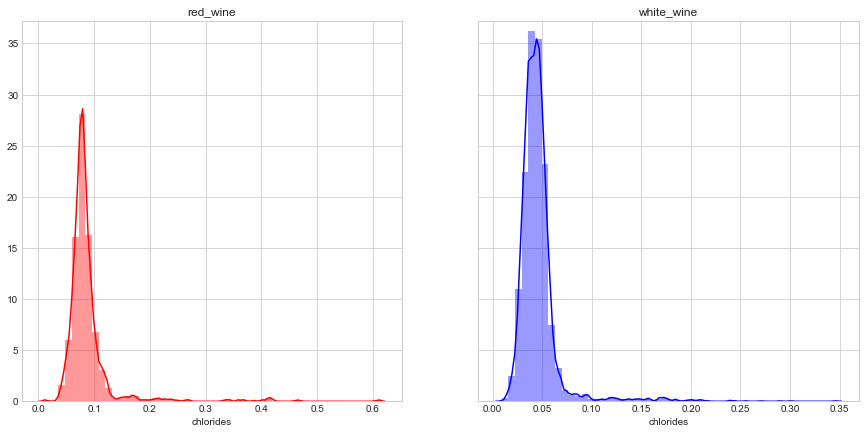

In [71]:
fig,(ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize= (15,7))
sns.distplot(df[df.type=='red']['chlorides'], color = 'r', ax=ax0)
ax0.set(title = 'red_wine')
sns.distplot(df[df.type=='white']['chlorides'], color='blue', ax=ax1)
ax1.set(title = 'white_wine')
plt.show()

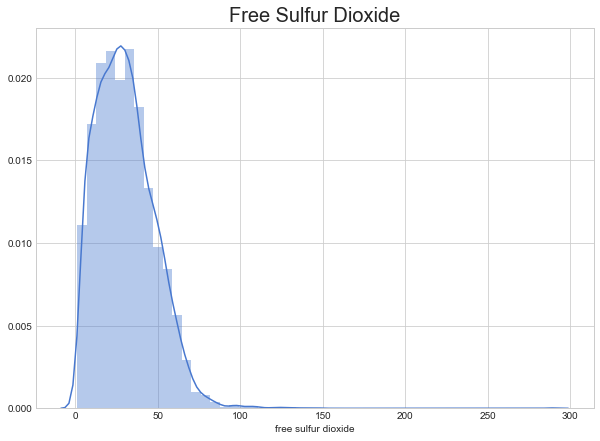

In [14]:
plt.figure(figsize=(10,7))
plt.title('Free Sulfur Dioxide', size = 20)
sns.distplot(df['free sulfur dioxide'])
plt.show()

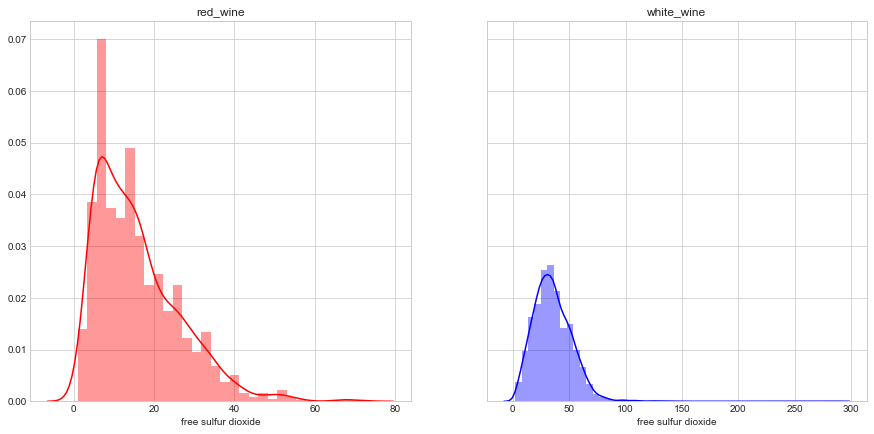

In [72]:
fig,(ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize= (15,7))
sns.distplot(df[df.type=='red']['free sulfur dioxide'], color = 'r', ax=ax0)
ax0.set(title = 'red_wine')
sns.distplot(df[df.type=='white']['free sulfur dioxide'], color='blue', ax=ax1)
ax1.set(title = 'white_wine')
plt.show()

## Total Sulfur Dioxide

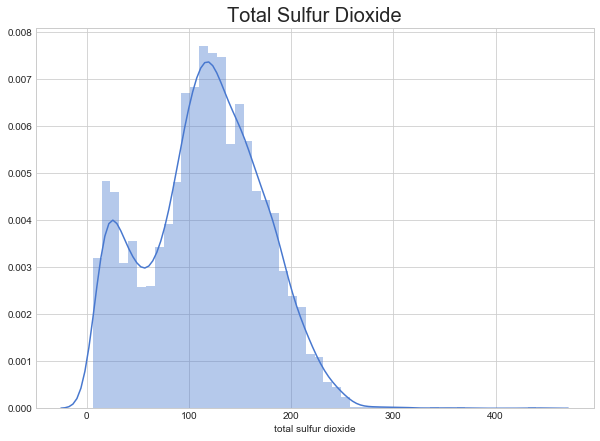

In [15]:
plt.figure(figsize=(10,7))
plt.title('Total Sulfur Dioxide', size = 20)
sns.distplot(df['total sulfur dioxide'])
plt.show()

이 부분은 대놓고 봉우리가 두 개여서 와인 타입을 나누어서 다시 그래프를 그려보았다.

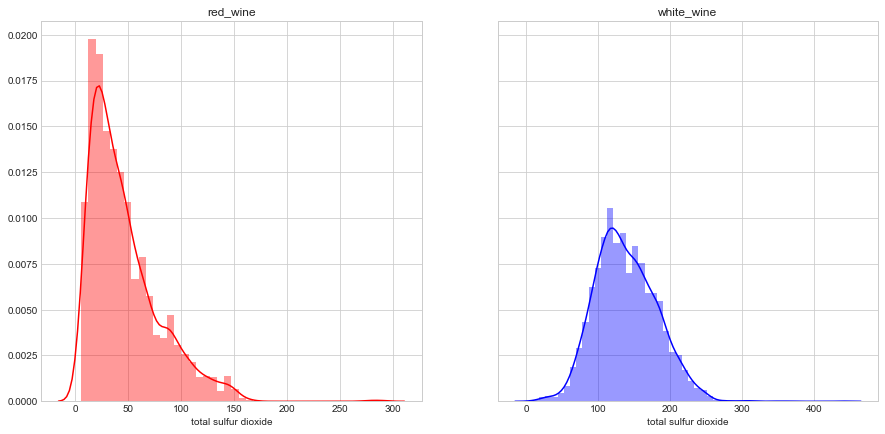

In [57]:
fig,(ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize= (15,7))
sns.distplot(df[df.type=='red']['total sulfur dioxide'], color = 'r', ax=ax0)
ax0.set(title = 'red_wine')
sns.distplot(df[df.type=='white']['total sulfur dioxide'], color='blue', ax=ax1)
ax1.set(title = 'white_wine')
plt.show()

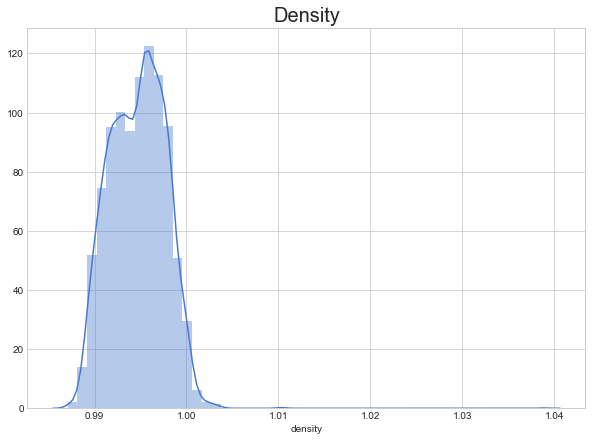

In [16]:
plt.figure(figsize=(10,7))
plt.title('Density', size = 20)
sns.distplot(df['density'])
plt.show()

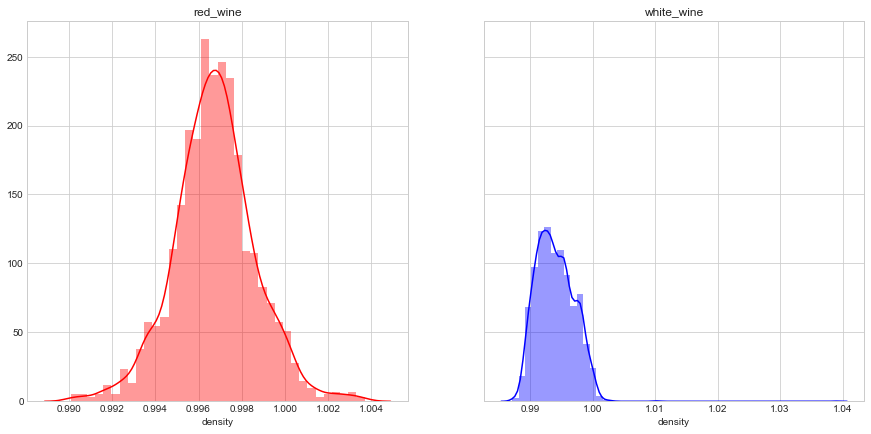

In [58]:
fig,(ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize= (15,7))
sns.distplot(df[df.type=='red']['density'], color = 'r', ax=ax0)
ax0.set(title = 'red_wine')
sns.distplot(df[df.type=='white']['density'], color='blue', ax=ax1)
ax1.set(title = 'white_wine')
plt.show()

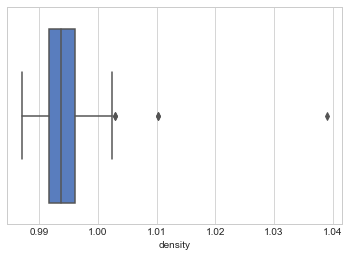

In [63]:
# white_wine에서 3개의 아웃라이어가 그래프를 망치고 있다.
sns.boxplot(df[df.type=='white']['density'],)
plt.show()

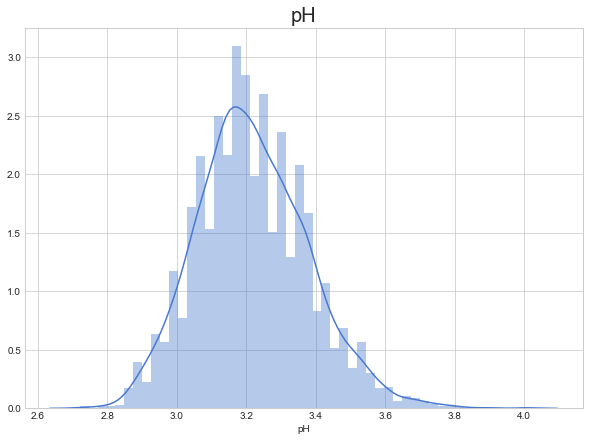

In [17]:
plt.figure(figsize=(10,7))
plt.title('pH', size = 20)
sns.distplot(df['pH'])
plt.show()

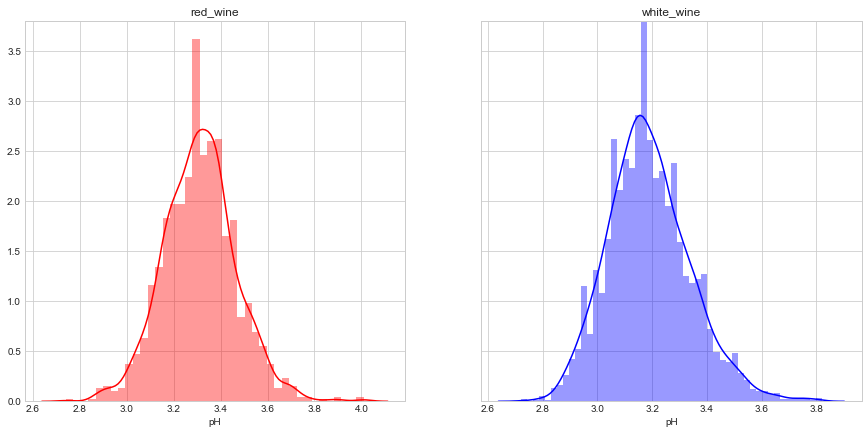

In [60]:
fig,(ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize= (15,7))
sns.distplot(df[df.type=='red']['pH'], color = 'r', ax=ax0)
ax0.set(title = 'red_wine')
sns.distplot(df[df.type=='white']['pH'], color='blue', ax=ax1)
ax1.set(title = 'white_wine')
plt.show()

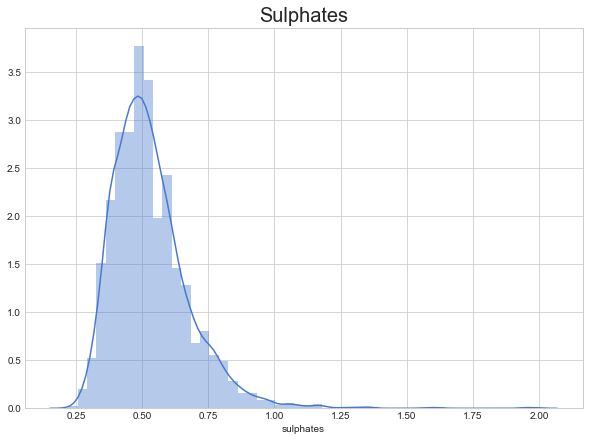

In [18]:
plt.figure(figsize=(10,7))
plt.title('Sulphates', size = 20)
sns.distplot(df['sulphates'])
plt.show()

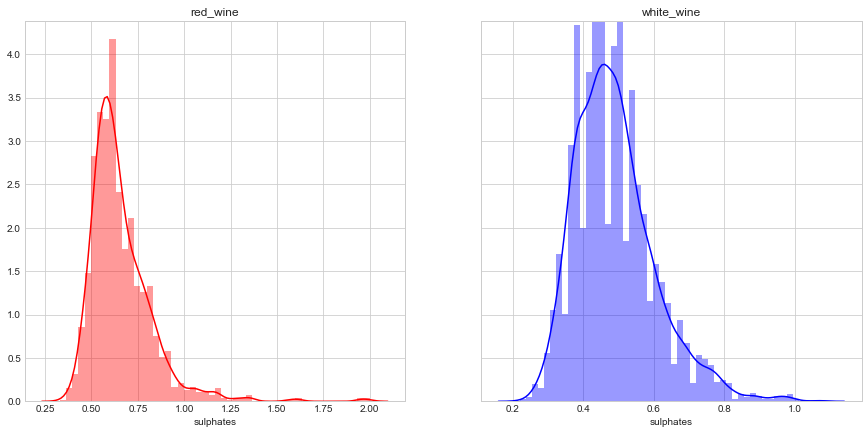

In [65]:
fig,(ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize= (15,7))
sns.distplot(df[df.type=='red']['sulphates'], color = 'r', ax=ax0)
ax0.set(title = 'red_wine')
sns.distplot(df[df.type=='white']['sulphates'], color='blue', ax=ax1)
ax1.set(title = 'white_wine')
plt.show()

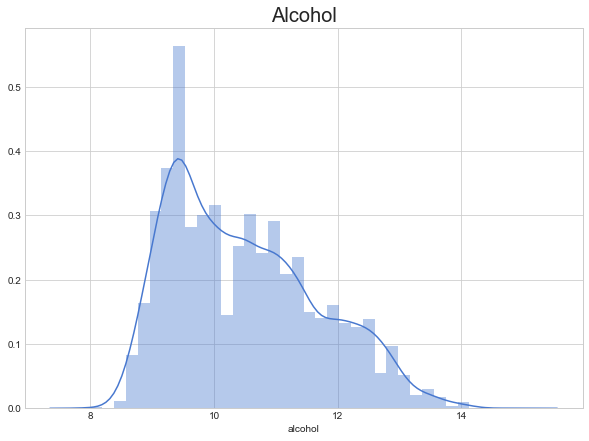

In [19]:
plt.figure(figsize=(10,7))
plt.title('Alcohol', size = 20)
sns.distplot(df['alcohol'])
plt.show()

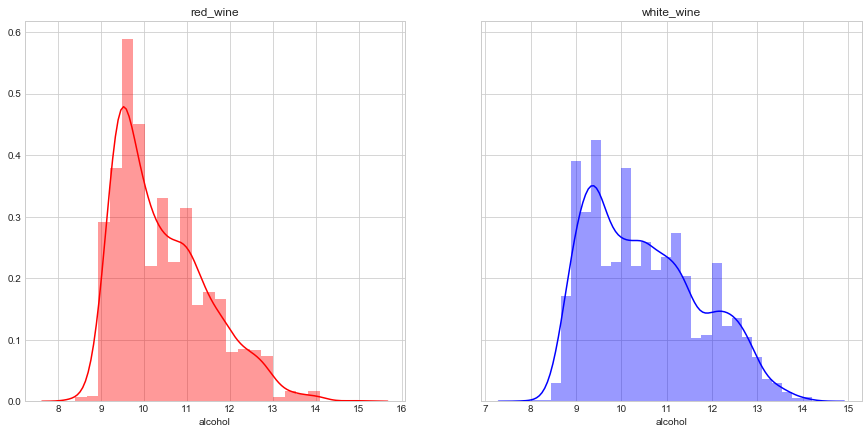

In [64]:
fig,(ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize= (15,7))
sns.distplot(df[df.type=='red']['alcohol'], color = 'r', ax=ax0)
ax0.set(title = 'red_wine')
sns.distplot(df[df.type=='white']['alcohol'], color='blue', ax=ax1)
ax1.set(title = 'white_wine')
plt.show()

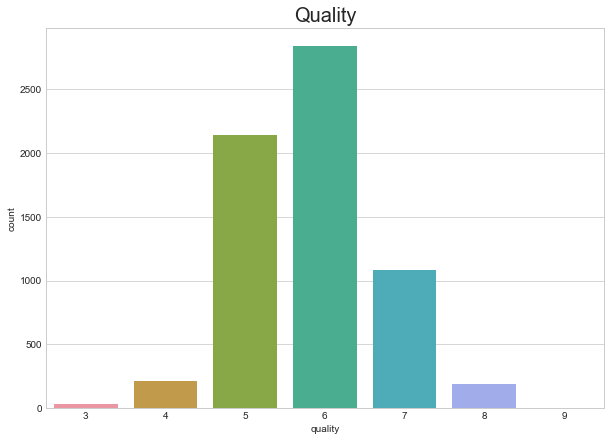

In [20]:
plt.figure(figsize=(10,7))
plt.title('Quality', size = 20)
sns.countplot(x = 'quality',data = df)
plt.show()

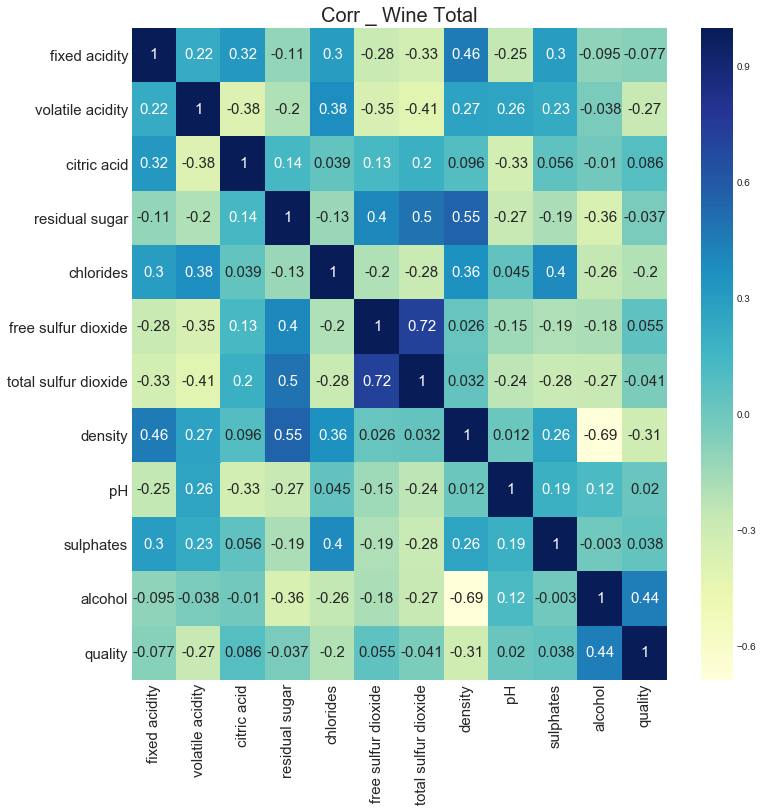

In [21]:
plt.figure(figsize=(12,12))
plt.title('Corr _ Wine Total', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
sns.heatmap(df.corr(), annot=True, annot_kws={"size":15}, cmap = "YlGnBu")
plt.show()

Text(0.5,1,'Corr _ Wine White')

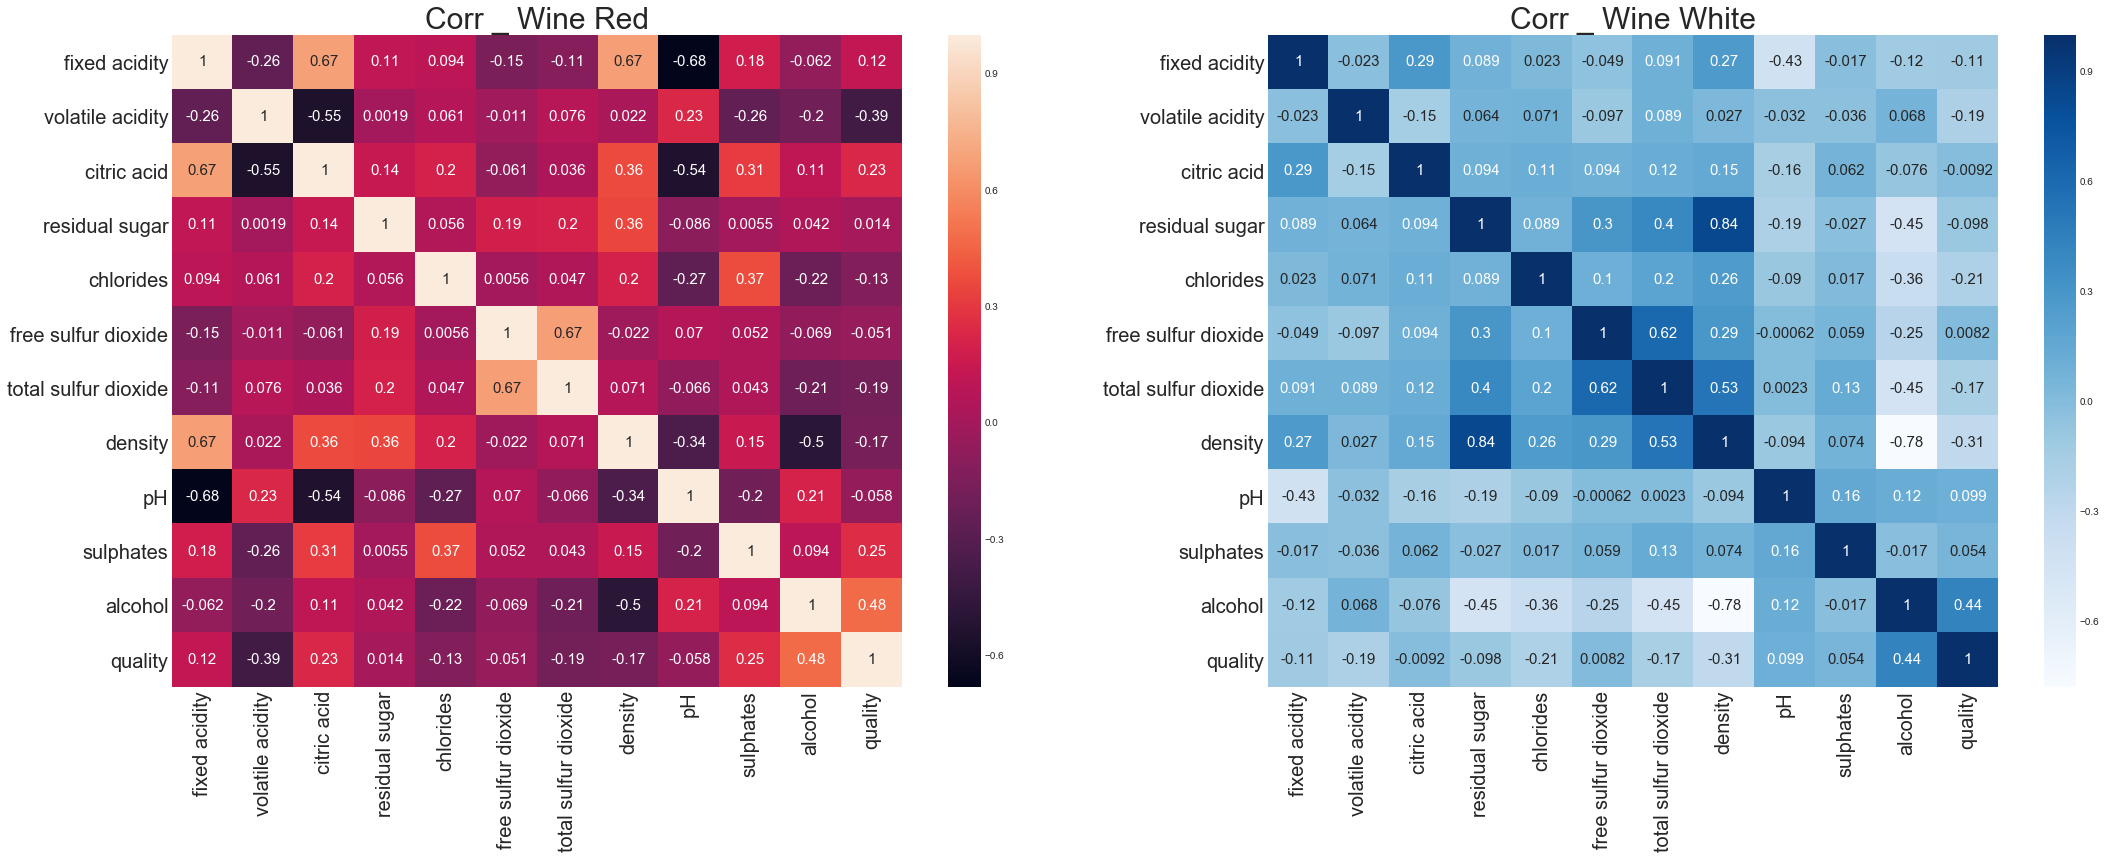

In [42]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(36,12))


g1 = sns.heatmap(df[df.type == 'red'].corr(), annot=True, annot_kws={"size":15}, ax=ax0)
t1x = g1.get_xticklabels()
t1y = g1.get_yticklabels()
g1.set_xticklabels(t1x, size=20)
g1.set_yticklabels(t1y, size=20)
g1.set_title('Corr _ Wine Red', size = 30)

g2 = sns.heatmap(df[df.type == 'white'].corr(), annot=True, annot_kws={"size":15}, cmap = "Blues", ax=ax1)
t2x = g1.get_xticklabels()
t2y = g1.get_yticklabels()
g2.set_xticklabels(t2x, size=20)
g2.set_yticklabels(t2y, size=20)
g2.set_title('Corr _ Wine White', size = 30)

In [96]:
#red_wine에서 유의미한 상관계수를 가진 피처만 추출
corr_compact_idx_red = pd.DataFrame(
    df[df.type == 'red'].corr().applymap(lambda x: (abs(x)>0.5) & (abs(x)<1.0) ).sum(), columns=['cnt']
).query("cnt > 0").index

print(corr_compact_idx_red)

Index(['fixed acidity', 'volatile acidity', 'citric acid',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH'],
      dtype='object')


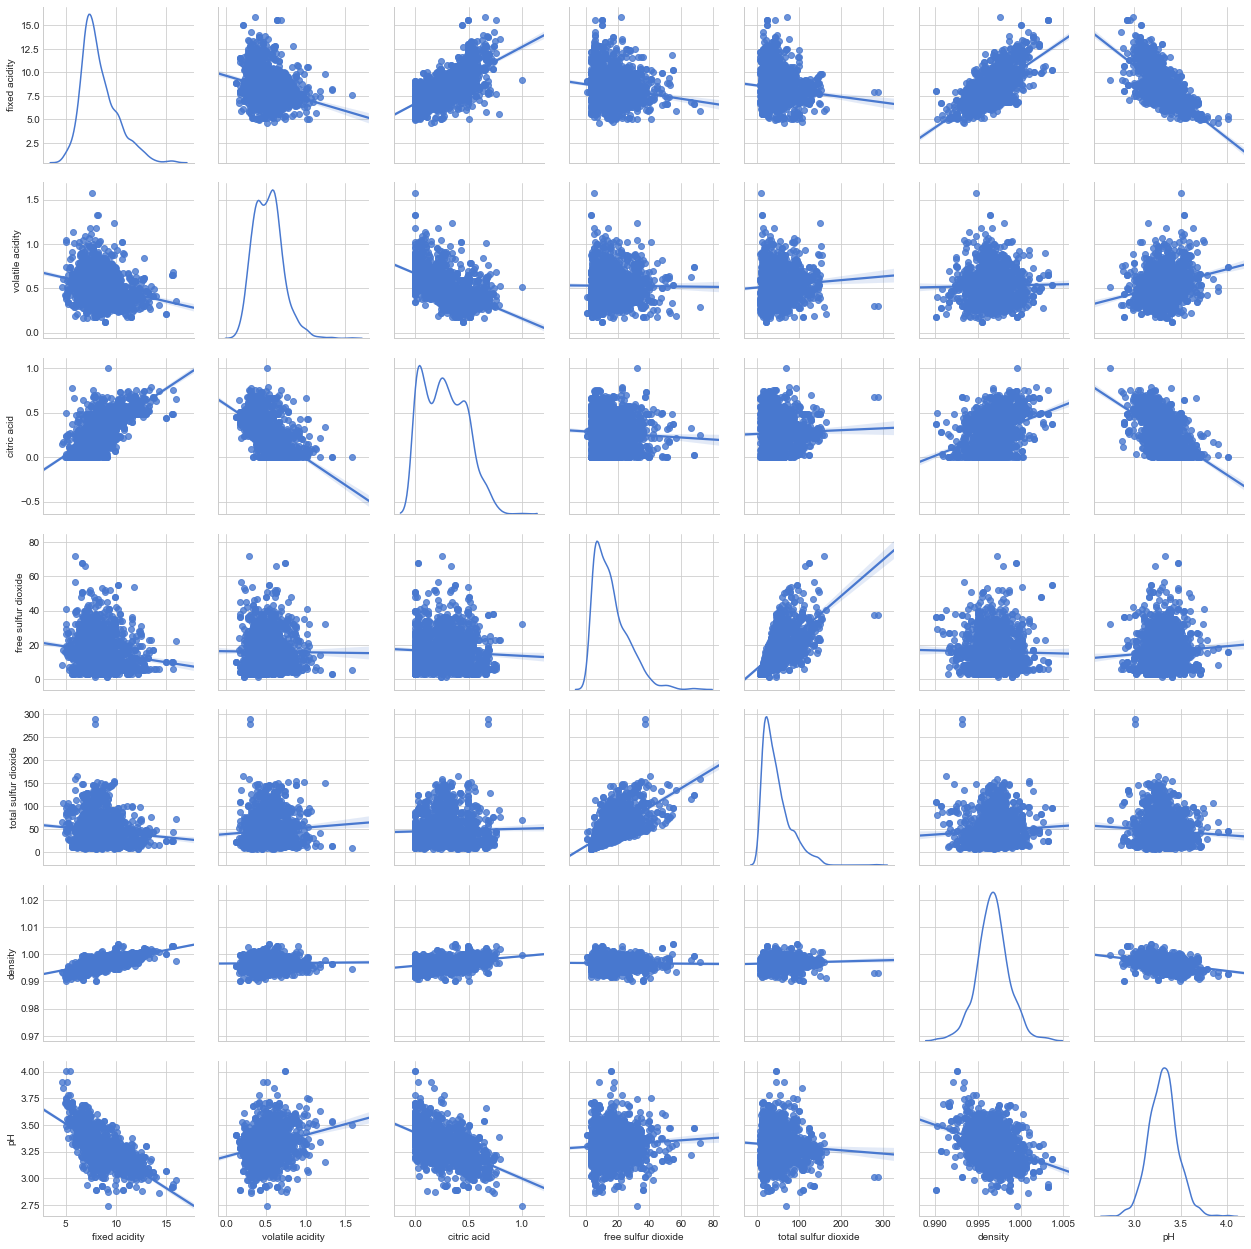

In [110]:
#그 피처로 pairplot을 그려본다
sns.pairplot(data = df[df.type == 'red'],
            vars = corr_compact_idx_red,
            kind = 'reg', diag_kind='kde')
plt.show()